In [4]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the combined dataset
data_path = "../data/combined_master_dataset.csv"
df = pd.read_csv(data_path)

In [3]:
# --- 1. Hugging Face Sentiment Analysis ---
print("\n\n--- Hugging Face Sentiment Analysis (DistilBERT) ---")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")



--- Hugging Face Sentiment Analysis (DistilBERT) ---


C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kashi\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [4]:
# Apply sentiment prediction (limit to first 512 tokens for speed)
def predict_sentiment(text):
    if pd.isna(text) or len(text) == 0:
        return "NEUTRAL"
    try:
        prediction = sentiment_pipeline(text[:512])[0]['label']
        return prediction
    except:
        return "ERROR"

df['hf_sentiment'] = df['content'].apply(predict_sentiment)


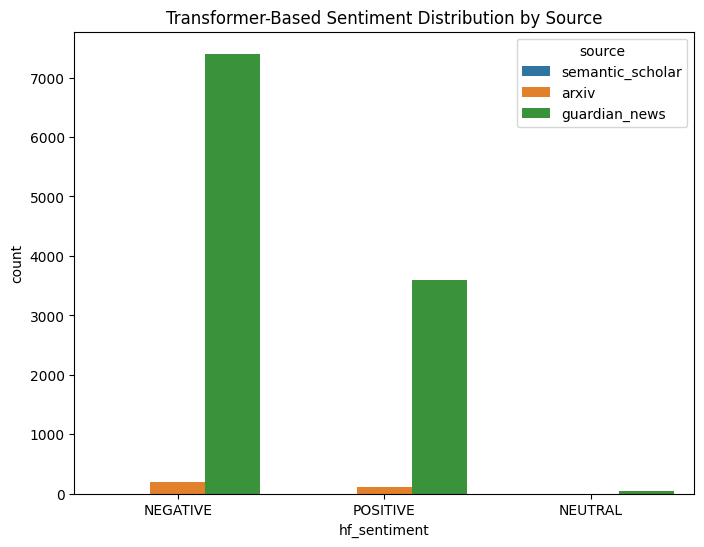

In [5]:
# Sentiment distribution by source
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='hf_sentiment', hue='source')
plt.title('Transformer-Based Sentiment Distribution by Source')
plt.show()

In [6]:
# --- 2. Zero-Shot Classification for Bias Framing (Optional Advanced) ---
print("\n\n--- Hugging Face Bias Framing Detection (Zero-Shot) ---")
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")



--- Hugging Face Bias Framing Detection (Zero-Shot) ---


C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kashi\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [7]:
# Define bias framing labels
bias_labels = ["supportive", "stigmatizing", "neutral"]

In [8]:
# Apply bias detection to a subset for demo 
def detect_bias(text):
    if pd.isna(text) or len(text) == 0:
        return "neutral"
    try:
        prediction = classifier(text[:512], candidate_labels=bias_labels)
        return prediction['labels'][0]
    except:
        return "neutral"

In [9]:
# For demo, predict on a sample (full dataset can be heavy)
sample_df = df.sample(200, random_state=42)  # Modify size as needed
sample_df['bias_framing'] = sample_df['content'].apply(detect_bias)

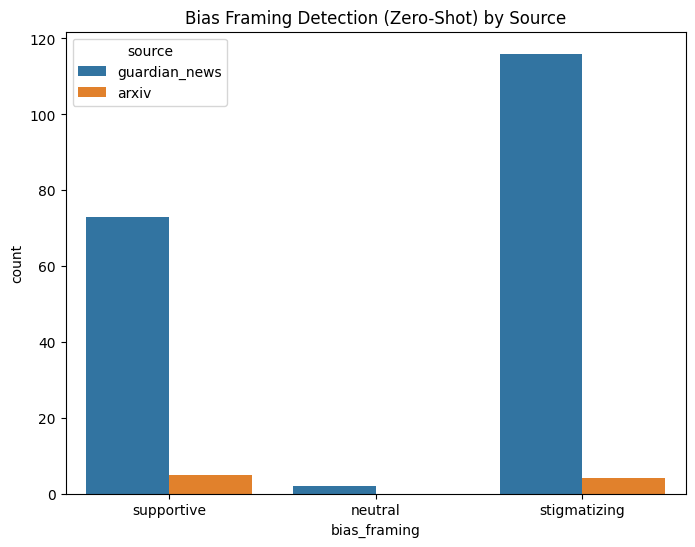

In [10]:
# Bias framing distribution
plt.figure(figsize=(8,6))
sns.countplot(data=sample_df, x='bias_framing', hue='source')
plt.title('Bias Framing Detection (Zero-Shot) by Source')
plt.show()

In [11]:
# Save updated data with Hugging Face labels
df.to_csv("../data/combined_master_dataset_with_hf_sentiment.csv", index=False)
sample_df.to_csv("../data/sample_bias_framing_results.csv", index=False)

print("\nHugging Face Enhanced Analysis Complete!")


Hugging Face Enhanced Analysis Complete!


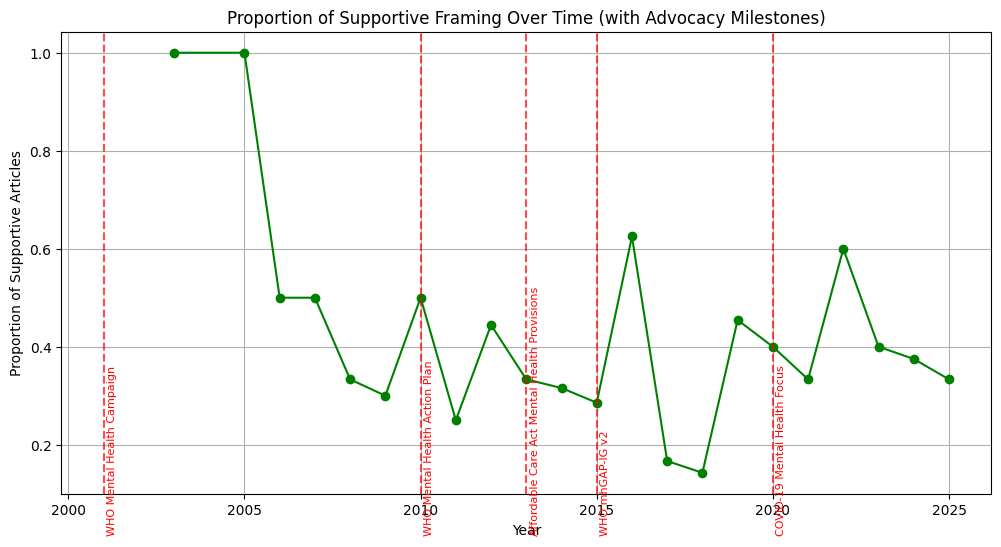

In [8]:
# --- Supportive Bias Trend Over Time ---
bias_sample_path = "../data/sample_bias_framing_results.csv"
bias_df = pd.read_csv(bias_sample_path)

supportive_trend = bias_df[bias_df['bias_framing'] == 'supportive'].groupby('year').size() / bias_df.groupby('year').size()
supportive_trend = supportive_trend.dropna()

plt.figure(figsize=(12,6))
plt.plot(supportive_trend.index, supportive_trend.values, marker='o', color='green')

for year, label in advocacy_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year+0.1, 0.02, label, rotation=90, color='red', fontsize=8)

plt.title('Proportion of Supportive Framing Over Time (with Advocacy Milestones)')
plt.xlabel('Year')
plt.ylabel('Proportion of Supportive Articles')
plt.grid(True)
plt.show()


In [5]:
# Load the enhanced dataset
data_path = "../data/combined_master_dataset_with_hf_sentiment.csv"
df = pd.read_csv(data_path)




--- Sentiment Trend Over Time ---


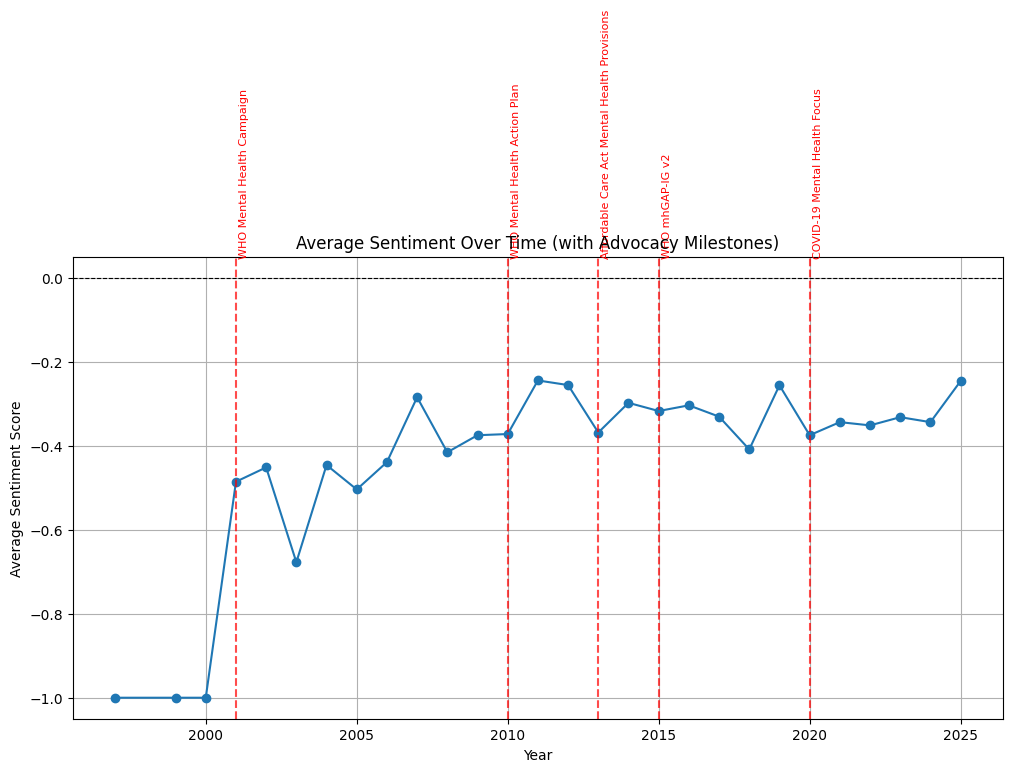

In [6]:
# --- 1. Sentiment Trend Over Time ---
print("\n\n--- Sentiment Trend Over Time ---")

# Map sentiment labels to numeric values
sentiment_map = {"POSITIVE": 1, "NEGATIVE": -1, "NEUTRAL": 0, "ERROR": 0}
df['sentiment_score'] = df['hf_sentiment'].map(sentiment_map)

sentiment_trend = df.groupby('year')['sentiment_score'].mean().dropna()

plt.figure(figsize=(12,6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mark key advocacy events
advocacy_events = {
    2001: "WHO Mental Health Campaign",
    2010: "WHO Mental Health Action Plan",
    2013: "Affordable Care Act Mental Health Provisions",
    2015: "WHO mhGAP-IG v2",
    2020: "COVID-19 Mental Health Focus"
}
for year, label in advocacy_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year+0.1, 0.05, label, rotation=90, color='red', fontsize=8)

plt.title('Average Sentiment Over Time (with Advocacy Milestones)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()




--- Supportive Bias Trend Over Time ---


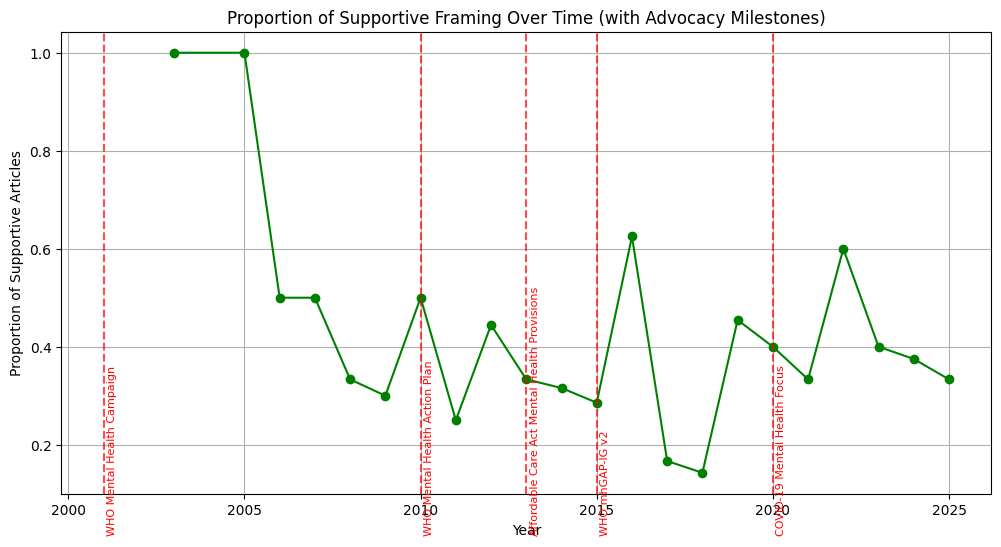


Advocacy Trend Analysis Complete!


In [7]:
# --- 2. Supportive Bias Trend Over Time ---
print("\n\n--- Supportive Bias Trend Over Time ---")

# Load the bias classification sample
bias_sample_path = "../data/sample_bias_framing_results.csv"
bias_df = pd.read_csv(bias_sample_path)

supportive_trend = bias_df[bias_df['bias_framing'] == 'supportive'].groupby('year').size() / bias_df.groupby('year').size()
supportive_trend = supportive_trend.dropna()

plt.figure(figsize=(12,6))
plt.plot(supportive_trend.index, supportive_trend.values, marker='o', color='green')

for year, label in advocacy_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year+0.1, 0.02, label, rotation=90, color='red', fontsize=8)

plt.title('Proportion of Supportive Framing Over Time (with Advocacy Milestones)')
plt.xlabel('Year')
plt.ylabel('Proportion of Supportive Articles')
plt.grid(True)
plt.show()

print("\nAdvocacy Trend Analysis Complete!")